# Operation with matrices - Calculate P*Q

In [2]:
import numpy as np 

P= ([[1, 1, 2],[2,0,3]])
Q= ([[3,0],[1,4],[1,-1]])
print('Array P*Q is:')
print(np.dot(P,Q))

Array P*Q is:
[[ 6  2]
 [ 9 -3]]


## BONUS POINTS PROBLEM: Noise reduction by SVD

1. The file *noise_data.xlsx* contains some pattern data. Read the file and plot the data using *plt.imshow*.
2. Add some noise in the data.
3. Use low-rank approximation of a matrix to construct approximations of the data with added noise from step 2.
4. Comment everyting you might think of.

In [4]:
# importing libraries

import os
import numpy as np
import pandas as pd
import numpy.linalg as nla
import scipy.linalg as sla
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import PIL
from PIL import Image
import time
%matplotlib inline

In [5]:
# Read the data set

df_noise = pd.read_excel(r'C:\Users\User\Desktop\Brainster\5.Math & Stats\HomeWork\WorkShop 1\noise_data.xlsx',header=None)
df_noise

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
# Info about the data-set

df_noise.info()
df_noise.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       46 non-null     int64
 1   1       46 non-null     int64
 2   2       46 non-null     int64
 3   3       46 non-null     int64
 4   4       46 non-null     int64
 5   5       46 non-null     int64
 6   6       46 non-null     int64
 7   7       46 non-null     int64
 8   8       46 non-null     int64
 9   9       46 non-null     int64
 10  10      46 non-null     int64
 11  11      46 non-null     int64
 12  12      46 non-null     int64
 13  13      46 non-null     int64
 14  14      46 non-null     int64
 15  15      46 non-null     int64
 16  16      46 non-null     int64
 17  17      46 non-null     int64
 18  18      46 non-null     int64
 19  19      46 non-null     int64
 20  20      46 non-null     int64
 21  21      46 non-null     int64
 22  22      46 non-null     int64
 23  23      46 non-nu

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,46.0,46.0,46.0,46.0,46.0,46.0,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.0,46.0,46.0,46.0,46.0,46.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,0.478261,0.478261,0.478261,0.826087,...,0.826087,0.478261,0.478261,0.478261,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.505047,0.505047,0.505047,0.383223,...,0.383223,0.505047,0.505047,0.505047,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0


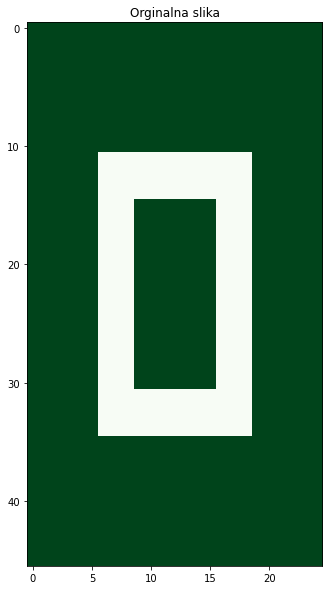

(46, 25)

In [7]:
# Read and show original image

img_excel=pd.read_excel(r'C:\Users\User\Desktop\Brainster\5.Math & Stats\HomeWork\WorkShop 1\noise_data.xlsx',header=None)
plt.figure(figsize=(10, 10))
plt.title('Orginalna slika')
plt.imshow(img_excel,cmap ='Greens',interpolation ='nearest')
plt.show()
img_excel.shape

In [8]:
# Noise in the data- set with random.normal

loc = 0.05
scale=0.1
size=([46,25])

img_noise = np.random.normal(loc,scale, size)
print(img_noise)

[[-0.00200928  0.09717456  0.13081429 ... -0.01526062 -0.1380297
  -0.07170113]
 [ 0.02108521 -0.02279165  0.06297851 ... -0.17873854 -0.02612481
   0.12921311]
 [-0.01241078  0.05548763  0.11557082 ...  0.16315607 -0.04616625
   0.09631688]
 ...
 [-0.03461426  0.12692858  0.03762192 ...  0.19265781  0.04153907
   0.07410398]
 [ 0.13574553  0.03482889  0.10406383 ...  0.09651908  0.21548687
   0.07510088]
 [ 0.05868037  0.09298096  0.05648913 ... -0.11622437 -0.01021134
   0.27842598]]


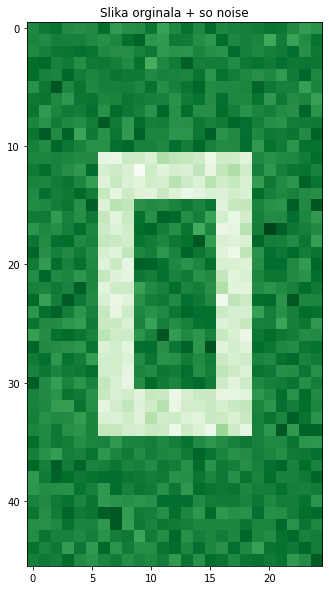

In [9]:
# Normal image with noise 

noise_new = img_excel + img_noise
plt.figure(figsize=(10, 10))
plt.title('Slika orginala + so noise')
plt.imshow(noise_new,cmap ='Greens',interpolation ='nearest')
plt.show()

In [11]:
# SVD of the image matrix

U, S, V = nla.svd(noise_new) 
# print(U, S, V)

# print('U = \n', U)
# print('S = \n', S) # this one is given as an array, not a matrix
# print('V = \n', V)

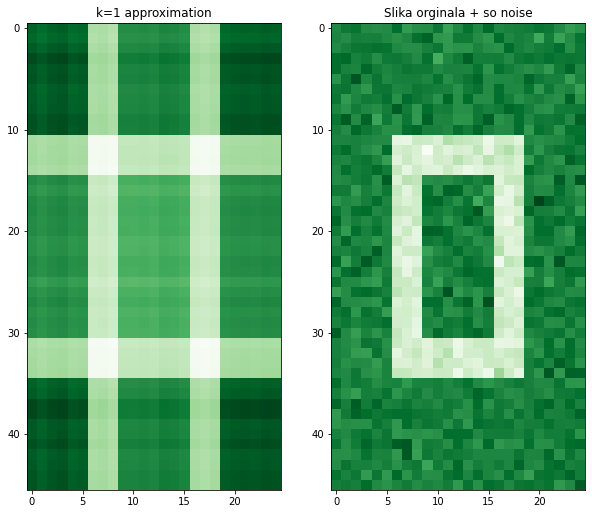

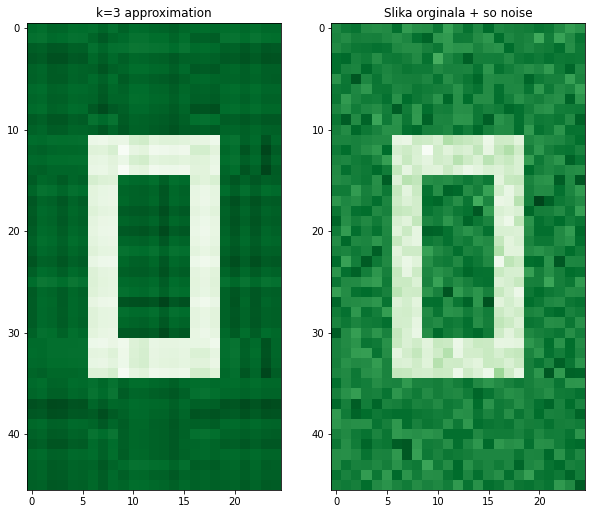

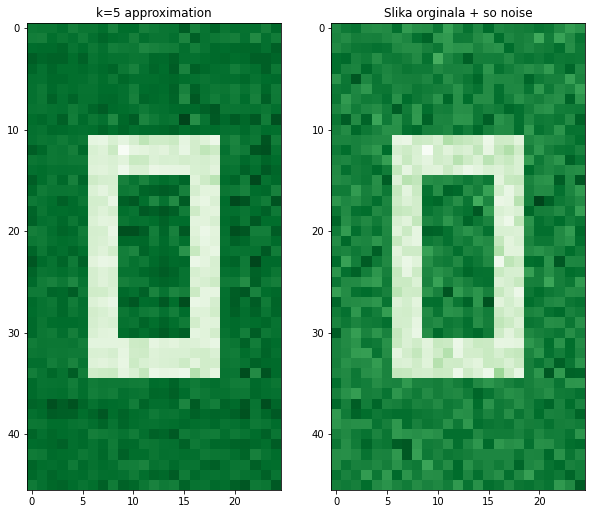

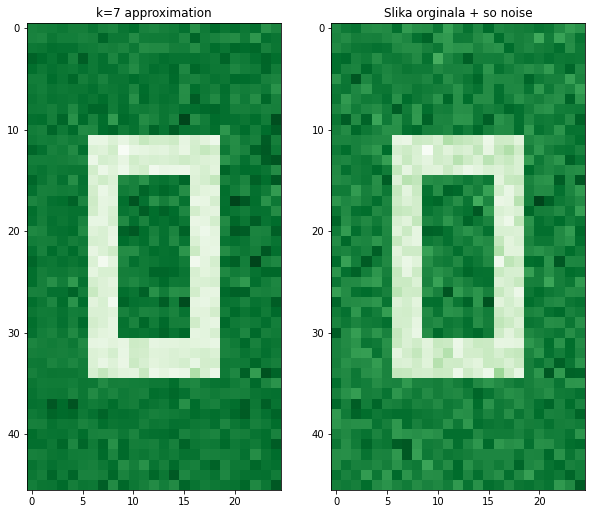

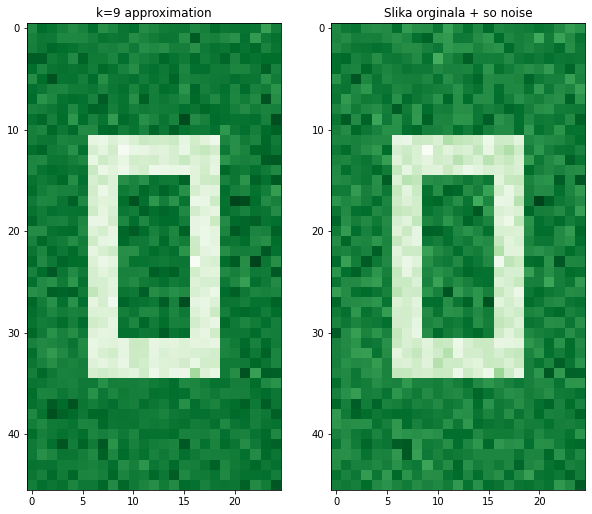

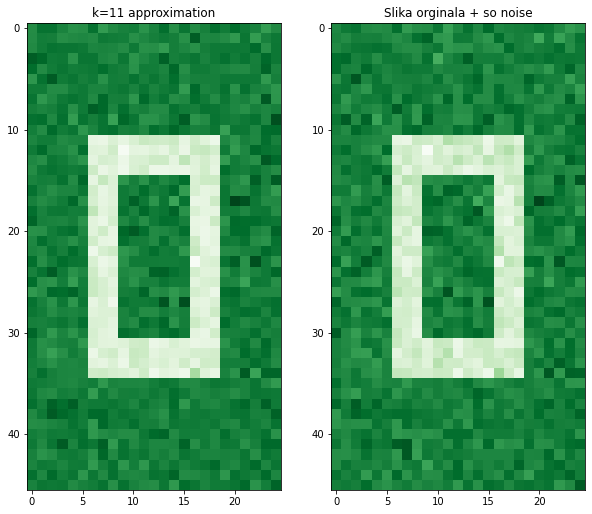

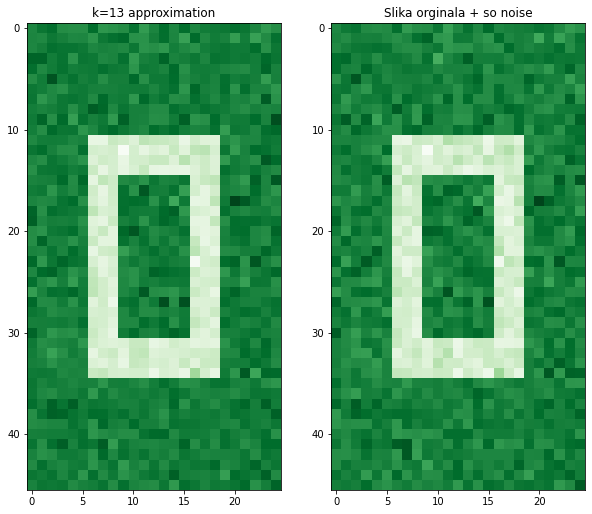

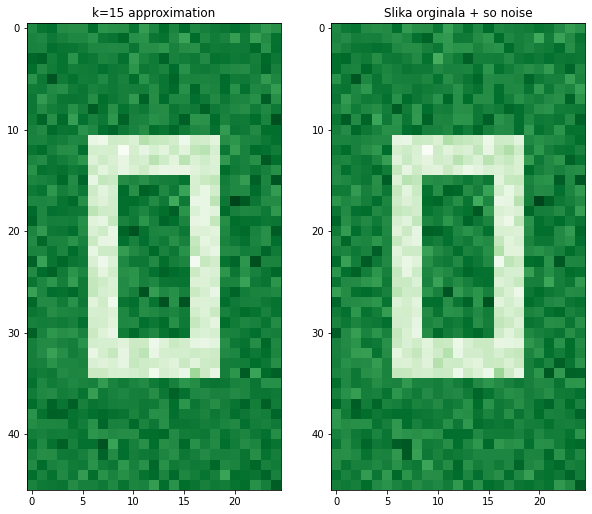

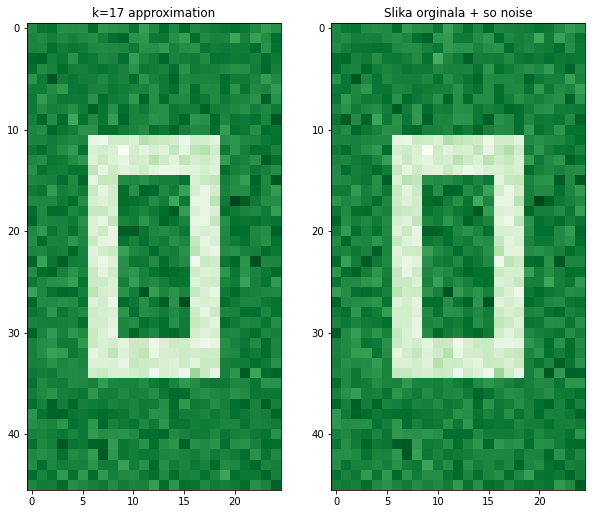

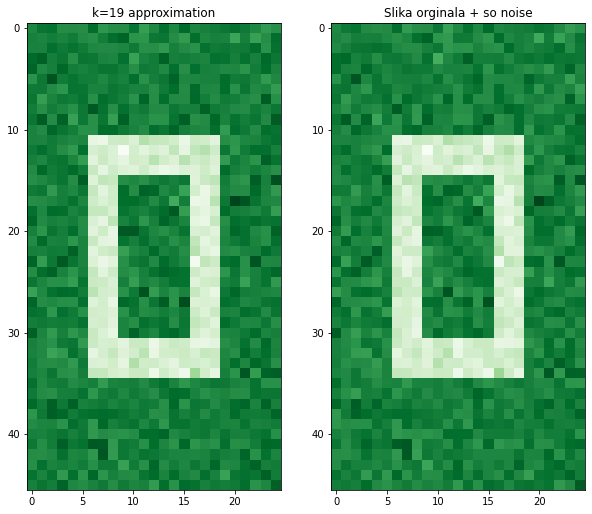

In [12]:
# Creating low-rank approximations

for k in range(1, 21, 2):
    img_k =U[:, :k].dot(np.diag(S[:k]).dot(V[:k,:]))
    fig = plt.figure(figsize=(10, 10))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img_k, cmap='Greens')
    plt.title(f'k={k} approximation')
    fig.add_subplot(1, 2, 2)
    plt.imshow(noise_new, cmap='Greens',interpolation ='nearest')
    plt.title('Slika orginala + so noise')
    plt.show()

In [ ]:
# Mozeme da zabelezime deka pri vmetnuvanje na noise -ot na pocetokot imame prilicno nejasna slika.
# Kako se dvizime nadole po aprokcimaciite mozeme da zaklucime deka se pojasno i pojasno se dobiva orginalnata slika.
# Odnosno ako slikata ja pravime po 1 signularna vrednost taa e nejasna i ne mozeme konkretno da vidime za sto stanuva zbor.
# Kolku poveke se zgolemuva istata, tolku slikata e pobistra. 
# So sekoj vektor dobivame nova perspektiva, nova dimenzija vo toj prostor, sto nie go dekomponirame. 